In [1]:
from bindsnet.network import load_network
from bindsnet.encoding import poisson
from bindsnet.analysis.plotting import plot_weights
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle
import torch
from encoder import *
import time as T
plt.rcParams["figure.figsize"] = (20, 20)
lfname = 'logs/' + str(int(T.time())) + '_anomaly.txt'

In [2]:
track2 = pickle.load(open('encoding/test_anomaly.p', 'rb'))

In [3]:
network = load_network('trained.net')
network.connections[('X', 'Ae')].update_rule = None
exc_monitor = network.monitors['exc']

In [4]:
time = 500

In [5]:
def log(msg):
    print(msg, end='')
    with open(lfname, 'a') as f:
        f.write(msg)

In [6]:
def detect(spikes):
    cols = torch.sum(spikes, dim=1)
    for i, v in enumerate(cols):
        if v != 0:
            log(f'Neuron: {i} Spikes: {int(v)}\n')

torch.Size([100, 200])
Iteration 44
Neuron: 11 Spikes: 1
Neuron: 18 Spikes: 1
Neuron: 24 Spikes: 3
Neuron: 28 Spikes: 2
Neuron: 40 Spikes: 1
Neuron: 41 Spikes: 1
Neuron: 47 Spikes: 1
Neuron: 55 Spikes: 3
Neuron: 70 Spikes: 2
Neuron: 99 Spikes: 3


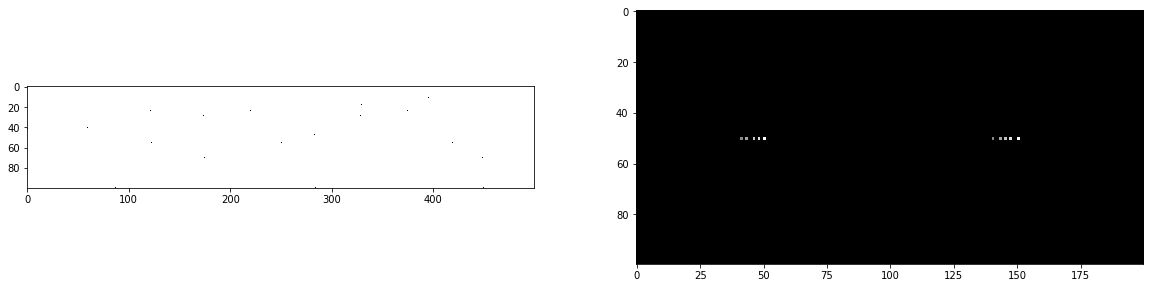

In [7]:
for i in range(1, len(track2)):
    orig = torch.cat((track2[i-1], track2[i]), dim=1)
    print(orig.shape)
    pt = orig.view(-1)
    pt = poisson(pt, time)
    
    inpts = {'X': pt}
    network.run(inpts=inpts, time=time)
    spikes = exc_monitor.get('s')
    
    log(f'Iteration {i}\n')
    detect(spikes)
    
    fig = plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.imshow(spikes, cmap='binary')
    plt.subplot(2, 2, 2)
    plt.imshow(orig, cmap='gist_gray')
    plt.show()
    
    clear_output(wait=True)

In [8]:
network.connections[('X', 'Ae')].w.shape

torch.Size([20000, 100])

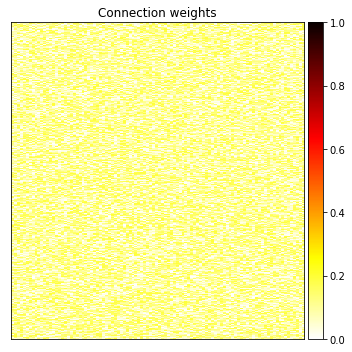

In [9]:
plot_weights(network.connections[('X', 'Ae')].w)